### 독버섯 분류
 - 데이터셋 : mushroom.csv
 - 알고리즘 : 지도학습>분류
   * LogisticRegression, DecisonTreeClasssifier, VotingClassifier
 - 타겟 : 클래스
 - 피쳐 : 전부 사용

[1] 데이터 준비

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [64]:
mushroomDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\MachineLearning\data\mushrooms.csv')
mushroomDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
mushroomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [66]:
# ?를 t로 변환
mushroomDF['stalk-root'].replace('?','t',inplace=True)

In [67]:
mushroomDF['stalk-root'].value_counts()

stalk-root
b    3776
t    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [68]:
mushroomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [69]:
featureDF = mushroomDF.iloc[:,1:]
targetSR = mushroomDF['class']

print(featureDF.shape, featureDF.ndim)
print(targetSR.shape, targetSR.ndim)

(8124, 22) 2
(8124,) 1


In [70]:
mushroomDF['class'].unique()

array(['p', 'e'], dtype=object)

In [78]:
# 원-핫 인코딩을 통해 feature 값 변환
# items = []
# for i in featureDF.columns:
#     items.extend(featureDF[i].unique())
# items = np.array(items).reshape(-1,1)

# oh_encoder = OneHotEncoder()
# oh_encoder.fit(items)
# oh_labels = oh_encoder.transform(items)

X_features_ohe = pd.get_dummies(featureDF, columns=featureDF.columns,drop_first=True)
X_features_ohe
X_features_ohe = X_features_ohe.applymap(lambda x: 1 if x is True else (0 if x is False else x))
X_features_ohe

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


[2] 학습용 데이터셋 준비

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe,targetSR,
                                                    stratify=targetSR,
                                                    random_state=10)

[3] 학습

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train,y_train)



DecisionTreeClassifier()

In [81]:
# 모델 파라미터 확인 : 학습 데이터 기반 feature_importance 출력
print(f'dt_model.classes_ : {dt_model.classes_}')
print(f'dt_model.n_classes_ : {dt_model.n_classes_}')
print(f'dt_model.max_features_: {dt_model.max_features_}')
print(f'dt_model.feature_importances_: {dt_model.feature_importances_}')
print(f'dt_model.feature_names_in_: {dt_model.feature_names_in_}')

dt_model.classes_ : ['e' 'p']
dt_model.n_classes_ : 2
dt_model.max_features_: 95
dt_model.feature_importances_: [6.56567633e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.96661921e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.04908851e-02 0.00000000e+00 0.00000000e+00
 9.02993967e-03 0.00000000e+00 6.25901609e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.56379129e-03
 4.12458900e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.76955698e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.17276327e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.24228863e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

In [84]:
# 학습용 데이터셋에 대한 성능 
train_score = dt_model.score(X_train,y_train)

# 테스트 데이터셋에 대한 성능
test_score = dt_model.score(X_test,y_test)

print(train_score, test_score)

1.0 1.0


[4] 교차검증

In [88]:
from sklearn.model_selection import cross_validate

result = cross_validate(dt_model,X_train,y_train,
                     return_estimator=True,
                     return_train_score=True)
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.019654,0.004983,DecisionTreeClassifier(),1.00000,1.0
1,0.022860,0.005979,DecisionTreeClassifier(),0.99918,1.0
2,0.020251,0.005645,DecisionTreeClassifier(),1.00000,1.0
3,0.029776,0.003679,DecisionTreeClassifier(),1.00000,1.0
4,0.011822,0.000000,DecisionTreeClassifier(),1.00000,1.0


[5] 성능 향상 위한 튜닝

In [89]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,4,3,2,1]}

In [90]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 4, 3, 2, 1]})

In [91]:
# 가장 좋은 모델
best_dt_model = grid.best_estimator_

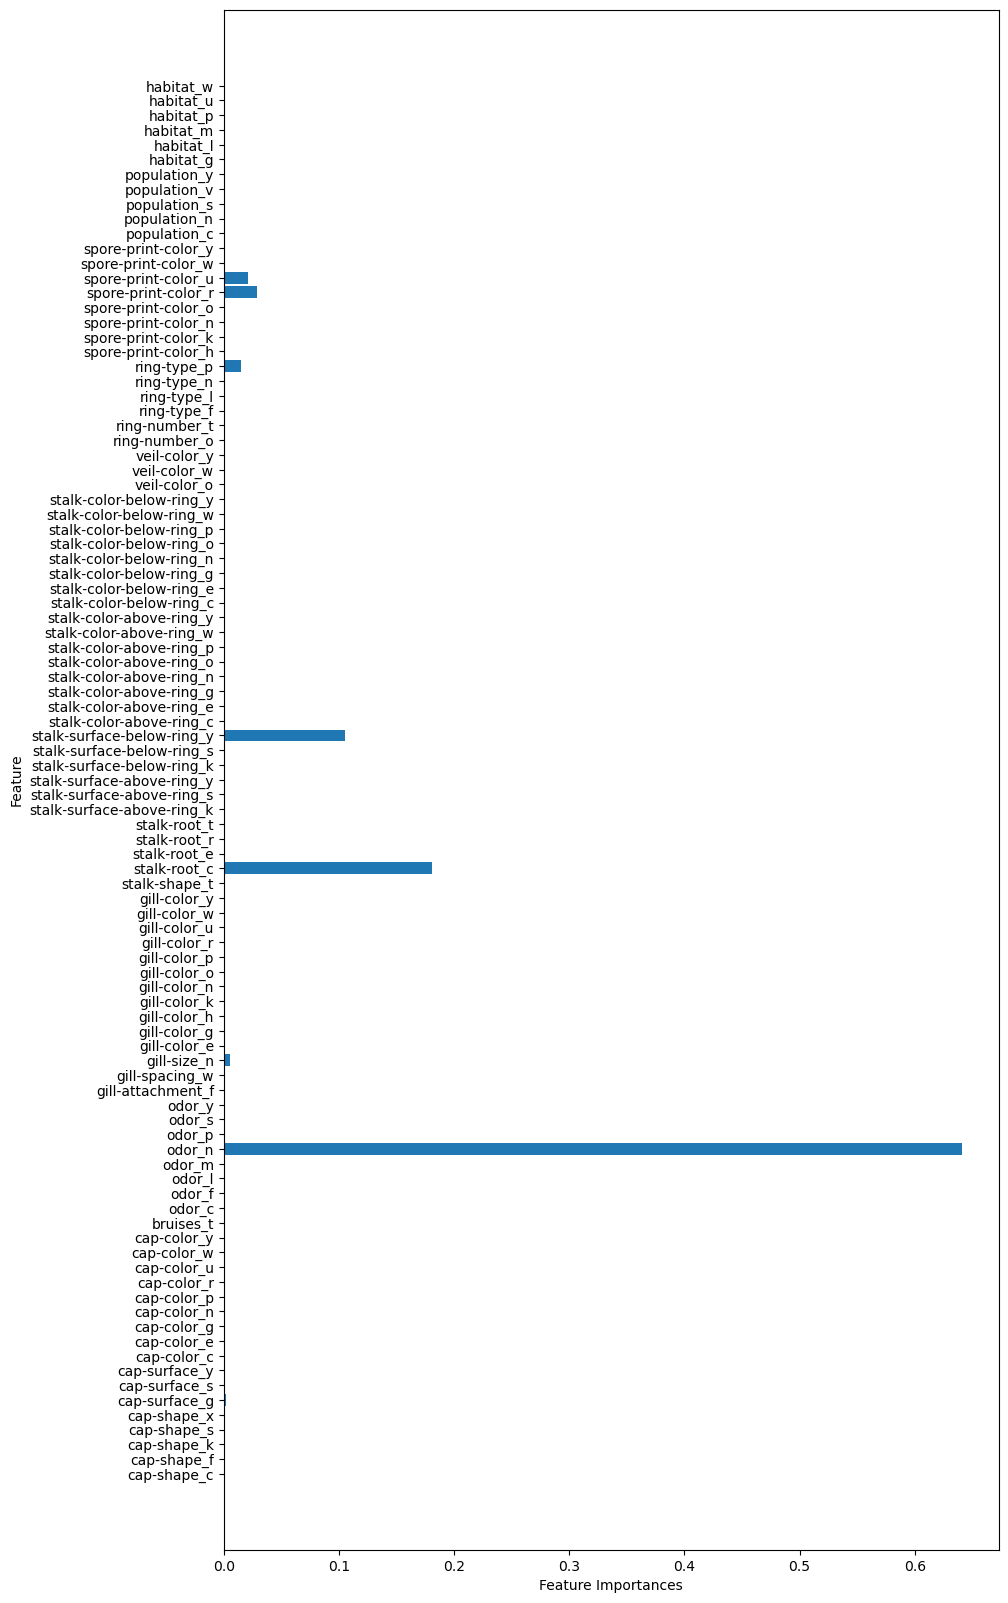

In [101]:
plt.figure(figsize=(10,20))
plt.barh(range(best_dt_model.n_features_in_),best_dt_model.feature_importances_ ,align='center')
plt.yticks(np.arange(best_dt_model.n_features_in_),best_dt_model.feature_names_in_)
plt.xlabel('Feature Importances')
plt.ylabel('Feature')
plt.show()